<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">BNB SPARQL<br>Query: Books by Subject</h1>
    <p class="lead">This notebook explains how to query BNB SPARQL service to retrieve books' records (that have an ISBN) indexed under a given Subject / Topic (LCSH).
</p>
  </div>
</div>

<a href="https://colab.research.google.com/github/BL-Labs/Jupyter-notebooks-projects-using-BL-Sources/blob/master/LOD_SPARQL/00_BNB_SPARQL_books_by_LCSH_subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The [BNB Linked Data Platform](https://bnb.data.bl.uk/) provides access to the [British National Bibliography (BNB)](http://www.bl.uk/bibliographic/natbib.html) published as linked open data and made available through SPARQL services. 

*Inspired by:*

https://github.com/hibernator11/notebook-lod-libraries 
by Gustavo Candela (https://github.com/hibernator11), Research and Development department at The Biblioteca Virtual Miguel de Cervantes, University of Alicante, Spain


<p class="alert alert-warning" role="alert">

## Global configuration

Set the Subject to search from [LCSH list](http://id.loc.gov/authorities/subjects.html):

In [ ]:
# Examples -- uncomment the desired subject, or added your own set of Subject and Label, and do "Run" or "Runtime" > "Run all" or "Run all cells":

# Subject = 'Nanotubes'
# Label = 'Nanotubes'

# Subject = 'Climaticchanges'
# Label = 'Climatic Changes'

Subject = 'Globalwarming'
Label = 'Global Warming'


In [ ]:
# Run me to input a different Subject (and label):
Subject = input("Enter the LoC Subject:")
Label = input("... and the Label for it:")

#### Required modules / libraries

In [3]:
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

## Let's query the repository by asking the publications indexed by the defined Subject
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

In [4]:
url = 'https://bnb.data.bl.uk/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/> 
PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX schema: <http://schema.org/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?book ?isbn ?title ?date ?author ?authorUri WHERE {{
      ?book dct:subject <http://bnb.data.bl.uk/id/concept/lcsh/{0}>; 
            bibo:isbn13 ?isbn ; 
            dct:title ?title ; 
            schema:author ?authorUri ; 
            schema:datePublished ?date . 
      ?authorUri rdfs:label ?author .
}}  
"""

query = query.format(Subject)

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query}, headers=headers)
print('Elements retrieved!')


Elements retrieved!


In [ ]:
# print(r.text)

## Save as a CSV 

In [6]:
bnbdata = json.loads(r.text)

# we need to delete ret_records.csv case it exists from previous runs 
# if it doesn't exist yet, it will give an error "rm: cannot remove 'ret_records.csv': No such file or directory", that's just fine! :)
!rm ret_records.csv

with open('ret_records.csv', 'w', newline='') as file:
    csv_out = csv.writer(file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)    

    #csv_out = csv.writer(open('bnb_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_out.writerow(['book', 'isbn', 'title', 'date', 'author', 'authorUri'])

    for i in bnbdata['results']['bindings']:
        book = isbn = title = date = author = authorUri = ''

        book = i['book']['value']
        #if "place" in i:
        isbn = i['isbn']['value']
        title = i['title']['value']
        date = i['date']['value']
        author = i['author']['value']
        authorUri = i['authorUri']['value']

        csv_out.writerow([book,isbn,title,date,author,authorUri])

print('Open the generated CSV to see all its contents -- Google Colab: under "Files" > click "ret_records.csv" -- we will also explore it bellow.')

rm: cannot remove 'ret_records.csv': No such file or directory
Open the generated CSV to see all its contents -- Google Colab: under "Files" > click "ret_records.csv" -- we will also explore it bellow.


## Exploring the data

In [ ]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('ret_records.csv')
df.head(5)

,book,isbn,title,date,author,authorUri
0,http://bnb.data.bl.uk/id/resource/018543304,9781138423862,Global climate change : turning knowledge into...,2017-09,"Kitchen, David, 1956-",http://bnb.data.bl.uk/id/person/KitchenDavid1956-
1,http://bnb.data.bl.uk/id/resource/018543304,9781138423862,Global climate change : turning knowledge into...,2017-09,"Kitchen, David, 1956-",http://bnb.data.bl.uk/id/person/KitchenDavid1956-
2,http://bnb.data.bl.uk/id/resource/013629848,9781841882697,What everyone should know about the future of ...,2007-04,"McGuire, Bill, 1954-",http://bnb.data.bl.uk/id/person/McGuireBill1954-
3,http://bnb.data.bl.uk/id/resource/013629848,9781841882697,What everyone should know about the future of ...,2007-04,"McGuire, Bill, 1954-",http://bnb.data.bl.uk/id/person/McGuireBill1954-
4,http://bnb.data.bl.uk/id/resource/019545357,9780367222628,Defrosting ancient microbes : emerging genomes...,2019-09,"Rogers, Scott O., 1953-",http://bnb.data.bl.uk/id/person/RogersScottO1953-


## How many items?

In [ ]:
# How many items?
len(df)

425

### Let's count the number of Books by author

In [ ]:
books_by_author = df['author'].value_counts()
books_by_author

Hansen, James E. (James Edward), 1941-     14
Houghton, J. T. (John Theodore), 1931-     12
Rogers, Scott O., 1953-                    12
Rothe, Delf.                               10
Booker, Christopher                         8
                                           ..
Fletcher, Charles H.                        1
Leggett, Jeremy K.                          1
Clark, Christopher James                    1
Sangster, Alan J.                           1
Evans, Colin (Writer on global warming)     1
Name: author, Length: 175, dtype: int64

### Create a chart to visualize the results
First let's see a top of publication Dates:

In [ ]:
books_by_date = df['date'].value_counts()
books_by_date

2009       66
2015       43
2008       41
2010       39
2007       36
2011       23
2013       19
2018       18
2006       15
2019       13
2016       12
2012        9
2017        8
2014        6
2014-05     6
2020-03     6
2017-09     4
2019-02     4
2008-09     4
2018-11     4
2019-09     4
2009-12     4
2017-06     3
2020        3
2010-12     2
2017-11     2
2007-04     2
2019-08     2
2017-05     2
2018-10     2
2015-04     2
2005        2
2017-01     2
2018-08     2
2018-02     2
2010-10     2
2019-05     2
2020-04     2
2018-01     2
2013-12     2
1989        1
2019-07     1
1993        1
Name: date, dtype: int64

This chart shows the number of books by date of publication:

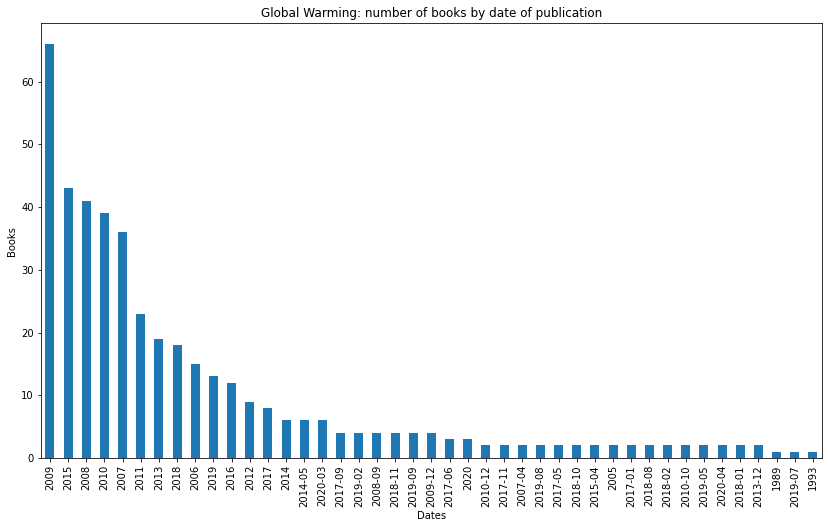

In [ ]:
ax = books_by_date.plot(kind='bar',
                                    figsize=(14,8),
                                    title= Label + ": number of books by date of publication")
ax.set_xlabel("Dates")
ax.set_ylabel("Books")
plt.show()

### Let's group the books by year

In [ ]:
# First we create a new column in pandas with the year
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'].head(5)

0    2017
1    2017
2    2007
3    2007
4    2019
Name: year, dtype: int64

### Creating the chart of books by year

In [ ]:
# .sort_index() is very important = sorts by year, instead of the the regular count number

books_by_year = df['year'].value_counts().sort_index()
books_by_year

1989     1
1993     1
2005     2
2006    15
2007    38
2008    45
2009    70
2010    43
2011    23
2012     9
2013    21
2014    12
2015    45
2016    12
2017    21
2018    30
2019    26
2020    11
Name: year, dtype: int64

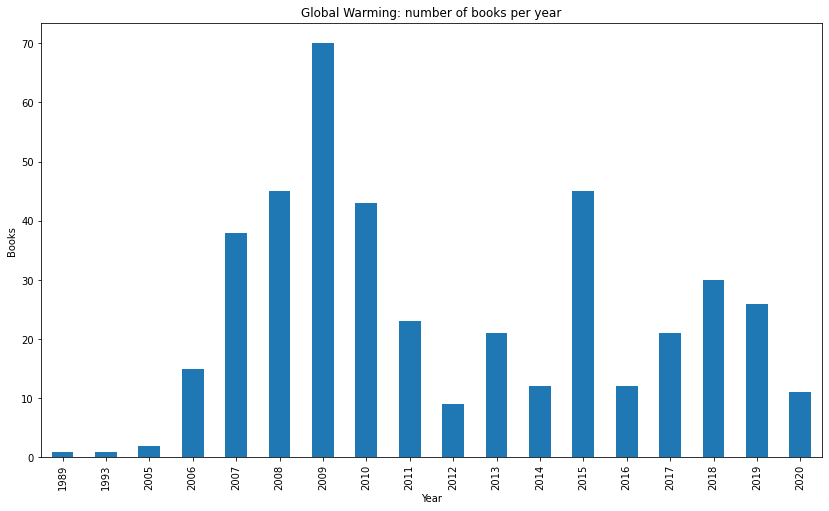

In [ ]:
ax = books_by_year.plot(kind='bar',
                                    figsize=(14,8),
                                    title= Label + ": number of books per year")
ax.set_xlabel("Year")
ax.set_ylabel("Books")
plt.show()

### Creating a Word Cloud of terms in the different titles

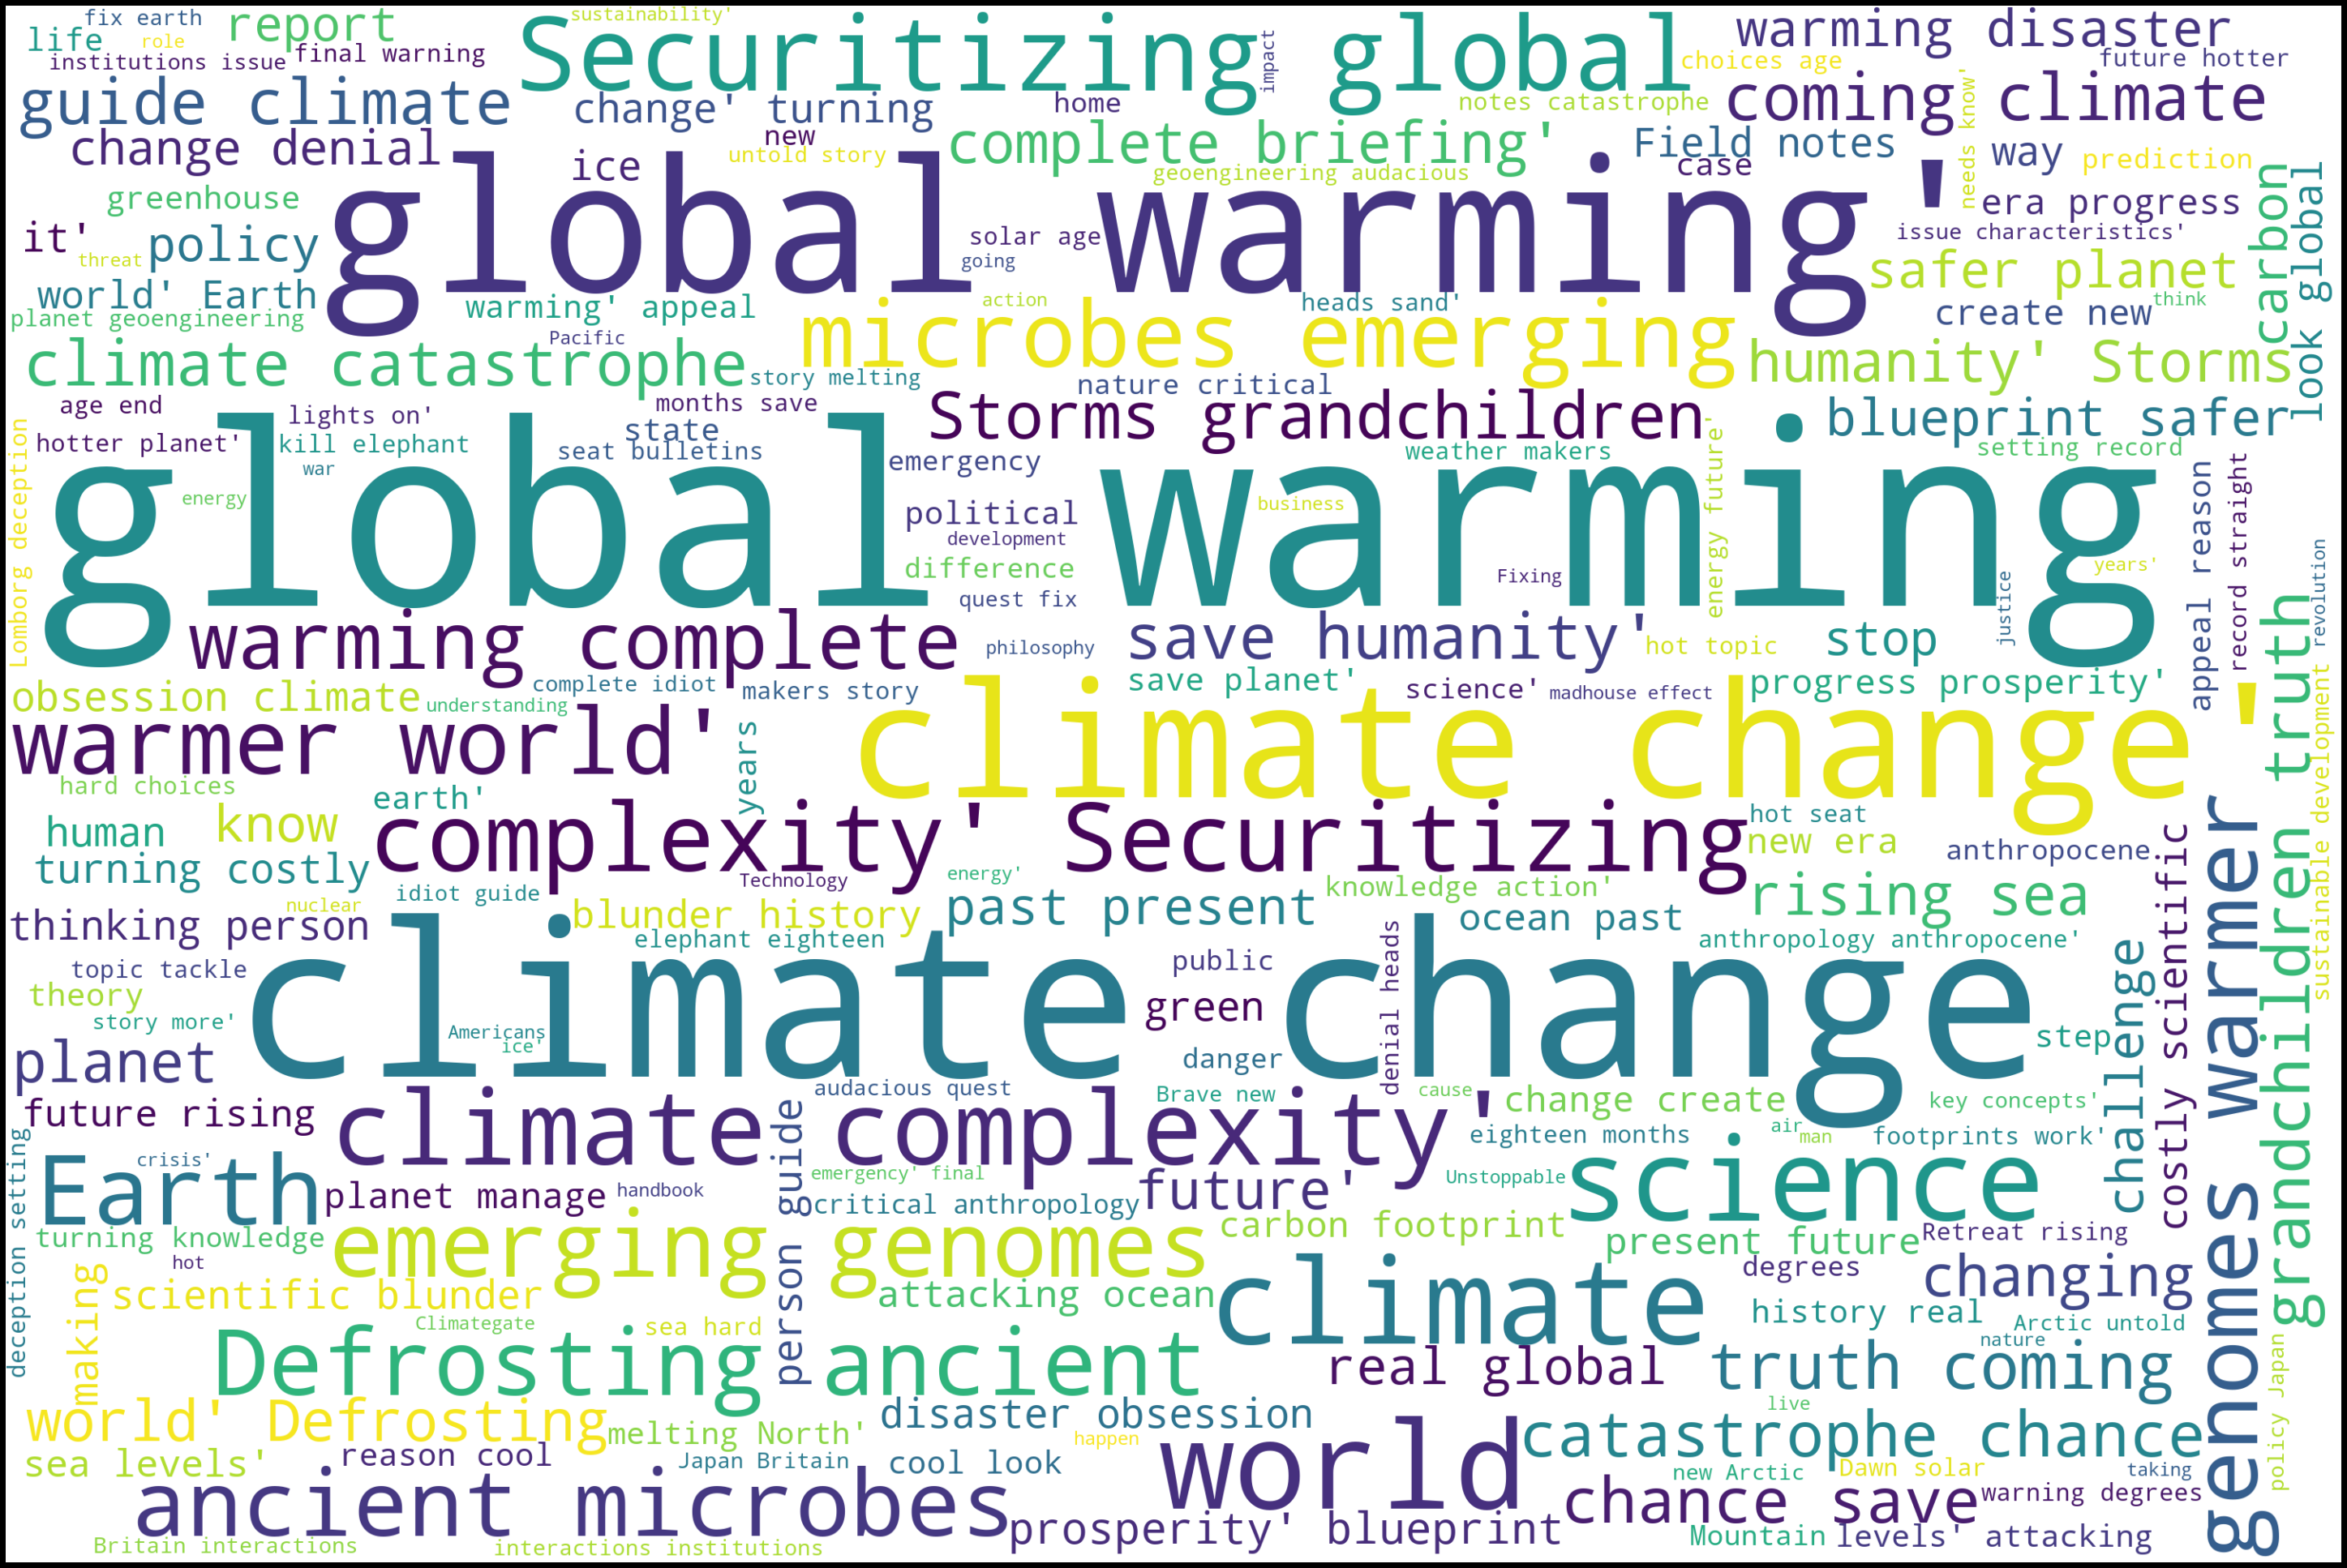

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Words appearing in the books titles: build the list of documents

list_of_documents=[]
 
for i in range (df["title"].size):
    list_of_documents.append(str(df["title"][i])) 


STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves", "etc"])


wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOP_WORDS).generate(str(list_of_documents))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()